In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 07.21-04.22.xlsx"
output1 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Order_Types.xlsx"
output2 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Ship&Hand.xlsx"
output3 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Cust_Types.xlsx"
output4 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Monthly Trend.xlsx"
output5 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 By Cust No.xlsx"
output6 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Largest Monthly Orders.xlsx"
output7 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Ship&Hand Percent.xlsx"
output8 = "V:/EOP_workpapers/Books/WMI/Python Reports/WH1023 July21-May22 Ship Cost vs No Ship Cost.xlsx"

In [2]:
df = pd.read_excel(file)
df = df.drop(columns=['Unnamed: 0'])
df['Amount_Due'] = df['Amount_Due'].astype(str).str.replace("-","").str.replace(",","").astype(float)
df.head(10)

,Customer_Number,Customer_Type,Business_Name,Invoice_Number,Order_Type,Date,S/H,S/T,Amount_Due
0,14057,D,United Notions & Fabrics,133847,Reg,04/04/2022,0.00,0.0,251.75
1,14678,D,Checker Distributors,133848,Reg,04/04/2022,0.00,0.0,12856.27
2,36705,D,Leisure Arts/PA Distribution,133849,Reg,04/04/2022,0.00,0.0,3973.32
3,36708,I,"Jonah's Hands, LLC",133852,Reg,04/04/2022,0.00,0.0,202.36
4,36742,C,Anabella's,133853,Reg,04/04/2022,7.99,0.0,87.91
5,36745,C,"Stashful, LLC",133851,Reg,04/04/2022,0.00,0.0,174.75
6,36842,C,Country Quilts,133850,Reg,04/04/2022,0.00,0.0,250.33
7,12464,C,Sea Needles,133856,M,04/05/2022,1.88,0.0,20.75
8,16692,D,Wichelt Import,133857,M,04/05/2022,14.67,0.0,161.46
9,25060,C,Cross Stitch Cupboard,133858,M,04/05/2022,2.09,0.0,23.06


In [3]:
df['Order_Type'].value_counts()
df['Date'] = df['Date'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head()

,Customer_Number,Customer_Type,Business_Name,Invoice_Number,Order_Type,Date,S/H,S/T,Amount_Due,month_year
0,14057,D,United Notions & Fabrics,133847,Reg,2022-04-04,0.00,0.0,251.75,2022-04
1,14678,D,Checker Distributors,133848,Reg,2022-04-04,0.00,0.0,12856.27,2022-04
2,36705,D,Leisure Arts/PA Distribution,133849,Reg,2022-04-04,0.00,0.0,3973.32,2022-04
3,36708,I,"Jonah's Hands, LLC",133852,Reg,2022-04-04,0.00,0.0,202.36,2022-04
4,36742,C,Anabella's,133853,Reg,2022-04-04,7.99,0.0,87.91,2022-04


In [4]:
order_type_trend = df.groupby(['month_year','Order_Type']).size()
order_type_trend.head(10)

month_year  Order_Type
2021-07     C               3
            J               9
            M               3
            P               6
            Reg            87
2021-08     J               7
            M             134
            Reg           118
2021-09     J              10
            M               4
dtype: int64

In [5]:
order_type_trend = order_type_trend.to_frame()
order_type_trend = order_type_trend.reset_index()
order_type_trend = order_type_trend.rename(columns={0 : "Counts"})
order_type_trend.head()

,month_year,Order_Type,Counts
0,2021-07,C,3
1,2021-07,J,9
2,2021-07,M,3
3,2021-07,P,6
4,2021-07,Reg,87


In [6]:
#order_type_trend.to_excel(output1, sheet_name="Order_Types")

### After trending this data in a pivot chart, it looks like there is no real trend in counts of each of the order types.

In [7]:
shiphand_trend = df.drop(columns=['Customer_Number', 'Invoice_Number']).groupby(['month_year']).sum()
shiphand_trend = shiphand_trend.reset_index()
shiphand_trend

,month_year,S/H,S/T,Amount_Due
0,2021-07,613.94,0.0,299608.76
1,2021-08,1228.17,0.0,106012.31
2,2021-09,992.91,0.0,303334.36
3,2021-10,1003.20,0.0,104934.16
4,2021-11,374.27,0.0,111589.89
5,2021-12,248.37,0.0,144312.51
6,2022-01,577.59,0.0,148396.49
7,2022-02,290.78,0.0,141125.12
8,2022-03,580.86,0.0,159456.54
9,2022-04,809.13,0.0,88510.96


In [8]:
#shiphand_trend.to_excel(output2, sheet_name="Ship&Hand")

In [9]:
customer_type_trend = df.groupby(['month_year','Customer_Type']).size()
customer_type_trend = customer_type_trend.to_frame()
customer_type_trend = customer_type_trend.reset_index()
customer_type_trend = customer_type_trend.rename(columns={0 : "Counts"})
customer_type_trend.head(10)

,month_year,Customer_Type,Counts
0,2021-07,2,1
1,2021-07,C,64
2,2021-07,D,26
3,2021-07,F,11
4,2021-07,I,1
5,2021-07,M,2
6,2021-07,R,3
7,2021-08,2,3
8,2021-08,C,202
9,2021-08,D,36


In [10]:
#customer_type_trend.to_excel(output3, sheet_name="Cust_Types")

In [11]:
amount_by_date = df.drop(columns=["Customer_Number", "Invoice_Number", "S/T"]).groupby(["month_year"]).sum(["Amount_Due"])
amount_by_date

,S/H,Amount_Due
month_year,,
2021-07,613.94,299608.76
2021-08,1228.17,106012.31
2021-09,992.91,303334.36
2021-10,1003.20,104934.16
2021-11,374.27,111589.89
2021-12,248.37,144312.51
2022-01,577.59,148396.49
2022-02,290.78,141125.12
2022-03,580.86,159456.54


In [12]:
counts_by_date = df.drop(columns=["Customer_Number", "Invoice_Number", "S/T"]).groupby(["month_year"]).size()
counts_by_date = counts_by_date.to_frame()
counts_by_date = counts_by_date.reset_index()
counts_by_date = counts_by_date.rename(columns={0 : "Counts"})
counts_by_date

,month_year,Counts
0,2021-07,108
1,2021-08,259
2,2021-09,126
3,2021-10,143
4,2021-11,74
5,2021-12,169
6,2022-01,147
7,2022-02,89
8,2022-03,91
9,2022-04,125


In [13]:
merged_df = pd.merge(left=amount_by_date, right=counts_by_date, how="inner", left_on="month_year", right_on="month_year")
merged_df["Avg_Order_Value"] = merged_df["Amount_Due"] / merged_df["Counts"]
ShiphandAndAVG = merged_df.drop(columns=["Amount_Due", "Counts"])
ShiphandAndAVG

,month_year,S/H,Avg_Order_Value
0,2021-07,613.94,2774.155185
1,2021-08,1228.17,409.313938
2,2021-09,992.91,2407.415556
3,2021-10,1003.20,733.805315
4,2021-11,374.27,1507.971486
5,2021-12,248.37,853.920178
6,2022-01,577.59,1009.499932
7,2022-02,290.78,1585.675506
8,2022-03,580.86,1752.269670
9,2022-04,809.13,708.087680


In [14]:
#merged_df.to_excel(output4)

<AxesSubplot:xlabel='month_year', ylabel='Amount'>

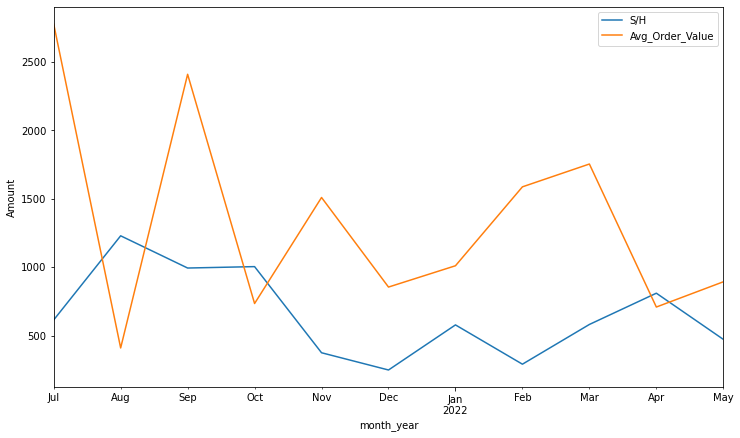

In [15]:
ShiphandAndAVG.plot(kind="line", x="month_year", ylabel="Amount", figsize=(12,7))

<AxesSubplot:xlabel='month_year', ylabel='Order Count'>

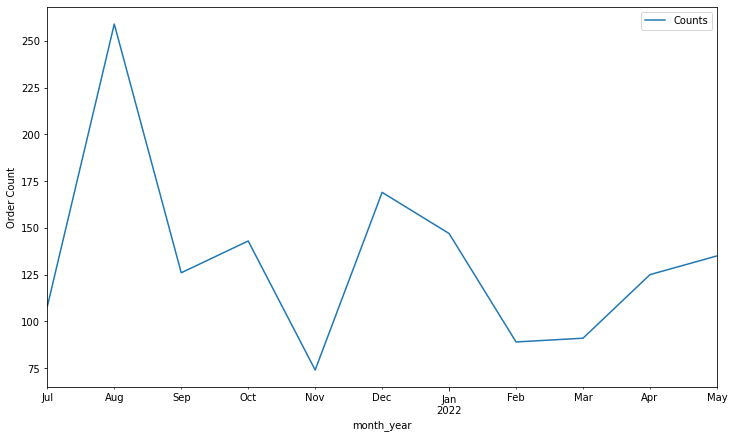

In [16]:
OrderCounts = merged_df.drop(columns=["Amount_Due", "S/H", "Avg_Order_Value"])
OrderCounts.plot(kind="line", x="month_year", ylabel="Order Count", figsize=(12,7))

In [17]:
biz_name = df.drop(columns=["Customer_Number", "Customer_Type", "Invoice_Number", "Order_Type", "Date", "S/H", "S/T"])
biz_name = biz_name.groupby(['month_year', 'Business_Name']).agg({'Amount_Due':sum})
biz_name = biz_name["Amount_Due"].groupby(['month_year'], group_keys=False).nlargest(5)
biz_name = biz_name.to_frame()
biz_name = biz_name.reset_index()
#biz_name.to_excel(output6, sheet_name="Largest_Monthly_Orders")

In [18]:
shiphand_trend = df.groupby(['month_year']).sum().reset_index()
shiphand_trend

,month_year,Customer_Number,Invoice_Number,S/H,S/T,Amount_Due
0,2021-07,3224718,14331006,613.94,0.0,299608.76
1,2021-08,8064868,34415402,1228.17,0.0,106012.31
2,2021-09,3591943,16766883,992.91,0.0,303334.36
3,2021-10,4344762,19048315,1003.20,0.0,104934.16
4,2021-11,2197958,9865199,374.27,0.0,111589.89
5,2021-12,5123169,22550515,248.37,0.0,144312.51
6,2022-01,4510958,19638171,577.59,0.0,148396.49
7,2022-02,2816606,11900279,290.78,0.0,141125.12
8,2022-03,2782442,12175891,580.86,0.0,159456.54
9,2022-04,3999342,16738625,809.13,0.0,88510.96


In [19]:
shiphand_trend["S/H Percentage"] = (shiphand_trend["S/H"] / shiphand_trend["Amount_Due"]) * 100
shiphand_trend = shiphand_trend.drop(columns= ["Customer_Number", "Invoice_Number", "S/H", "S/T", "Amount_Due"])
#shiphand_trend.to_excel(output7)

<AxesSubplot:xlabel='month_year', ylabel='S/H Percentage'>

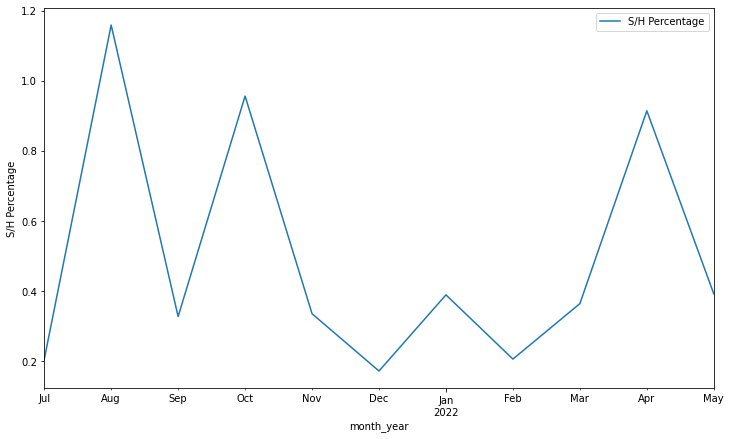

In [20]:
shiphand_trend.plot(kind="line", x="month_year", ylabel="S/H Percentage", figsize=(12,7))

In [21]:
df

,Customer_Number,Customer_Type,Business_Name,Invoice_Number,Order_Type,Date,S/H,S/T,Amount_Due,month_year
0,14057,D,United Notions & Fabrics,133847,Reg,2022-04-04,0.00,0.0,251.75,2022-04
1,14678,D,Checker Distributors,133848,Reg,2022-04-04,0.00,0.0,12856.27,2022-04
2,36705,D,Leisure Arts/PA Distribution,133849,Reg,2022-04-04,0.00,0.0,3973.32,2022-04
3,36708,I,"Jonah's Hands, LLC",133852,Reg,2022-04-04,0.00,0.0,202.36,2022-04
4,36742,C,Anabella's,133853,Reg,2022-04-04,7.99,0.0,87.91,2022-04
...,...,...,...,...,...,...,...,...,...,...
1461,5882,C,Ben Franklin #3007,133780,P,2022-03-14,2.39,0.0,26.37,2022-03
1462,8049,C,Deer Hill Farm X-Stitching,133829,Reg,2022-03-28,9.99,0.0,109.89,2022-03
1463,5882,C,Ben Franklin #3007,133051,P,2021-09-14,4.55,0.0,50.10,2021-09
1464,6459,C,Busy Beaver Arts & Crafts,133052,P,2021-09-14,2.69,0.0,29.66,2021-09


In [22]:
orders_w_shipping = df[df["S/H"] > 0]
orders_w_shipping = orders_w_shipping.groupby(['month_year']).size()
orders_w_shipping = orders_w_shipping.to_frame()
orders_w_shipping = orders_w_shipping.rename(columns={0 : "OrdersWithShipping"})
orders_w_shipping.reset_index()

,month_year,OrdersWithShipping
0,2021-07,55
1,2021-08,172
2,2021-09,41
3,2021-10,87
4,2021-11,24
5,2021-12,79
6,2022-01,99
7,2022-02,27
8,2022-03,39
9,2022-04,85


In [23]:
orders_no_shipping = df[df["S/H"] == 0]
orders_no_shipping = orders_no_shipping.groupby(['month_year']).size()
orders_no_shipping = orders_no_shipping.to_frame()
orders_no_shipping = orders_no_shipping.rename(columns={0 : "OrdersWithoutShipping"})
orders_no_shipping.reset_index()

,month_year,OrdersWithoutShipping
0,2021-07,53
1,2021-08,87
2,2021-09,85
3,2021-10,56
4,2021-11,50
5,2021-12,90
6,2022-01,48
7,2022-02,62
8,2022-03,52
9,2022-04,40


In [24]:
ship_cost_breakdown = pd.merge(left=orders_w_shipping, right=orders_no_shipping, how="inner", left_on="month_year", right_on="month_year")
ship_cost_breakdown = ship_cost_breakdown.reset_index()
#ship_cost_breakdown.to_excel(output8, sheet_name="WithShipvsWithout")
ship_cost_breakdown

,month_year,OrdersWithShipping,OrdersWithoutShipping
0,2021-07,55,53
1,2021-08,172,87
2,2021-09,41,85
3,2021-10,87,56
4,2021-11,24,50
5,2021-12,79,90
6,2022-01,99,48
7,2022-02,27,62
8,2022-03,39,52
9,2022-04,85,40
